In [135]:
import math
import random
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

## Shift Cipher

Let $\mathcal{P}=\mathcal{C}=\mathcal{K}=\mathbb{Z}_{26}$. For $0\leq K\leq 25$, define

<center>$e_K(x)=(x+K)\mod{26}$</center>

and

<center>$d_K(y)=(y-K)\mod{26}$</center>

($x,y\in\mathbb{Z}_{26}$)

In [74]:
class shift_cipher:
    def __init__(self, K):
        if K not in range(0, 25):
            raise ValueError("Value must be an integer from 0 to 25 inclusive.")
        self.K = K
        
    def encrypt_char(self, x):
        """
        Encrypts one single character x with the key
        Input: 
            x - plaintext character
        Output:
            y - encrypted character
        """
        if x not in range(0, 25):
            raise ValueError("Value must be an integer from 0 to 25 inclusive.")
        y = (x + self.K) % 26

        return y
    
    def decrypt_char(self, y):
        """
        Decrypts one character y with the key
        Input:
            y - ciphertext character
        Output:
            x - decrypted character
        """
        if y not in range(0, 25):
            raise ValueError("Value must be an integer from 0 to 25 inclusive.")
        x = (y - self.K) % 26
        
        return x
    
    def text_to_int_list(self, text):
        """
        Converts an inputted text to a list of integers
        Can be used for ciphertext or plaintext
        Input:
            text - string of characters to be encrypted
        Output:
            int_list - list of integers encoding the text
        """
        int_list = [ord(x) - 97 for x in text.lower()]
        
        return int_list
    
    def encrypt_int_list(self, int_list):
        """
        Converts list of integers to list of encrypted integers
        Input:
            int_list - list of integers representing plaintext
        Output:
            encrypted_int_list - list of integers representing ciphertext
        """
        encrypted_int_list = [self.encrypt_char(x) if x in range(0,25) else x for x in int_list]
        
        return encrypted_int_list
    
    def decrypt_int_list(self, int_list):
        """
        Converts list of integers to list of decrypted integers
        Input:
            int_list - list of integers representing plaintext
        Output:
            decrypted_int_list - list of integers representing plaintext
        """
        decrypted_int_list = [self.decrypt_char(x) if x in range(0,25) else x for x in int_list]
        
        return decrypted_int_list      

    def int_list_to_text(self, int_list):
        """
        Converts list of integers to text
        Can be used to create ciphertext or plaintext
        Input:
            int_list - list of integers to be decoded
        Output:
            text - string of text decoded from integers
            
        """
        char_list = [chr(x + 97) for x in int_list]
        text = ''.join(char_list)
        
        return text
    
    def encrypt_plaintext(self, plaintext):
        """
        Use text_to_int_list, encrypt_int_list,
            and int_list_to_text to encrypt a string
        Input:
            plaintext - string of characters to be encrypted
        Output:
            ciphertext - string of encrypted characters
        """
        int_list = self.text_to_int_list(plaintext)
        encrypted_int_list = self.encrypt_int_list(int_list)
        ciphertext = self.int_list_to_text(encrypted_int_list)
        
        return ciphertext
    
    def decrypt_ciphertext(self, ciphertext):
        """
        Use text_to_int_list, decrypt_int_list,
            and encrypted_int_list_to_ciphertext to encrypt a string
        Input:
            ciphertext - string of characters to be decrypted
        Output:
            decrypted_text - string of decrypted characters
        """
        int_list = self.text_to_int_list(ciphertext)
        decrypted_int_list = self.decrypt_int_list(int_list)
        decrypted_text = self.int_list_to_text(decrypted_int_list)
        
        return decrypted_text

In [75]:
# Create an instantiation of the shift_cipher class with K = 5
s = shift_cipher(5)

# Now create a ciphertext from a plaintext
plaintext = 'Hello, world!'
ciphertext = s.encrypt_plaintext(plaintext)
print(ciphertext)

mjqqt, btwqi!


In [76]:
# Now we can use the decrypt_ciphertext function 
# to decrypt the ciphertext
decrypted_text = s.decrypt_ciphertext(ciphertext)
print(decrypted_text)

hello, world!


### Analysis of shift cipher - frequency analysis

We will read a text file in and encrypt it, before doing a frequency analysis on the resulting ciphertext, to see if we can discern the key. For the frequency analysis, we will be looking for a key which maps the most common letters in our ciphertext to the most common letters in the English language (e, t, a, i, o, n, s, h, and r).

In [79]:
plaintext = ''
with open('Guardian_story.txt') as f:
    for line in f:
        plaintext = plaintext + line
print(plaintext)

Thousands of people gathered for the Pride march in South Africa’s largest city Johannesburg on Saturday despite a warning from the US embassy of a possible terror attack.

The event took place under heavy security in the upmarket district of Sandton, identified by the US embassy as a potential target.

South African authorities had assured organisers it was safe to proceed with the march, returning after a two-year break because of the coronavirus pandemic.

The US warning angered Pretoria. President Cyril Ramaphosa called it “unfortunate” and said it was causing “panic” in the country.

“We are always fighting for visibility and we are always in danger, so me hearing of the terrorist attack [warning], it didn’t even bother me,” said Anold Mulaisho, an LGBTQ activist, told AFP. “Either way, if I die my family already rejected me anyway, so no one is gonna get to miss me.”

State department spokesperson Ned Price on Friday praised security efforts in South Africa and Nigeria, where the

In [86]:
# Set a random key, k, and instantiate a shift_cipher with that key
k = random.randint(0, 25)
s = shift_cipher(k)

In [87]:
# Let's encrypt the plaintext and see what we get from the ciphertext
ciphertext = s.encrypt_plaintext(plaintext)
print(ciphertext)

cqxdbjwmb xo ynxyun pjcqnanm oxa cqn yarmn vjalq rw bxdcq joarlj’b ujapnbc lrch sxqjwwnbkdap xw bjcdamjh mnbyrcn j fjawrwp oaxv cqn db nvkjbbh xo j yxbbrkun cnaaxa jccjlt.

cqn nenwc cxxt yujln dwmna qnjeh bnldarch rw cqn dyvjatnc mrbcarlc xo bjwmcxw, rmnwcrornm kh cqn db nvkjbbh jb j yxcnwcrju cjapnc.

bxdcq joarljw jdcqxarcrnb qjm jbbdanm xapjwrbnab rc fjb bjon cx yaxlnnm frcq cqn vjalq, ancdawrwp jocna j cfx-hnja kanjt knljdbn xo cqn lxaxwjeradb yjwmnvrl.

cqn db fjawrwp jwpnanm yancxarj. yanbrmnwc lharu ajvjyqxbj ljuunm rc “dwoxacdwjcn” jwm bjrm rc fjb ljdbrwp “yjwrl” rw cqn lxdwcah.

“fn jan jufjhb orpqcrwp oxa erbrkrurch jwm fn jan jufjhb rw mjwpna, bx vn qnjarwp xo cqn cnaaxarbc jccjlt [fjawrwp], rc mrmw’c nenw kxcqna vn,” bjrm jwxum vdujrbqx, jw upkcz jlcrerbc, cxum joy. “nrcqna fjh, ro r mrn vh ojvruh juanjmh ansnlcnm vn jwhfjh, bx wx xwn rb pxwwj pnc cx vrbb vn.”

bcjcn mnyjacvnwc byxtnbynabxw wnm yarln xw oarmjh yajrbnm bnldarch nooxacb rw bxdcq joarlj jwm wrpnarj, fqnan cqn

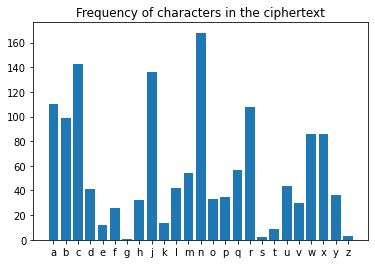

In [125]:
# Frequency analysis time!
characters = np.array([x for x in ciphertext if ord(x) in range(97, 123)])
chars, counts = np.unique(characters, return_counts=True)
freq_dict = {char: count for (char, count) in zip(chars, counts)}
fig = plt.figure()
plt.bar(x=chars, height=counts)
plt.title('Frequency of characters in the ciphertext')
plt.show()

In [139]:
df = pd.DataFrame({
    'character': chars,
    'frequency': counts
}).sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [140]:
df.head(5)

,character,frequency
0,n,168
1,c,143
2,j,136
3,a,110
4,r,108


'n' is our most common character. We can look at potential keys by seeing what the key would be in order to map our five most common characters to 'n'.

In [121]:
common_chars = ['e', 't', 'a', 'i', 'o']
n_ord = ord('n')
potential_keys = [(n_ord - ord(x)) % 26 for x in common_chars]
print(f'Potential keys are: {", ".join([str(k) for k in potential_keys])}')

Potential keys are: 9, 20, 13, 5, 25


Now we will make a matrix of our most common characters and their decrypted values under the potential keys

In [143]:
def decrypt_char(y, K):
    int_rep = ord(y) - 97
    x = (int_rep - K) % 26
    decrypted_char = chr(x + 97)

    return decrypted_char


for K in potential_keys:
    df[f'key_{K}'] = df.character.apply(lambda x: decrypt_char(x, K))

In [144]:
df.head()

,character,frequency,key_9,key_20,key_13,key_5,key_25
0,n,168,e,t,a,i,o
1,c,143,t,i,p,x,d
2,j,136,a,p,w,e,k
3,a,110,r,g,n,v,b
4,r,108,i,x,e,m,s


Based on this limited frequency analysis, it seems like the key is probably 9, so let's instantiate a shift_cipher object with K=9, and decrypt the text!

In [145]:
K = 9
s = shift_cipher(9)
decrypted_text = s.decrypt_ciphertext(ciphertext)
print(decrypted_text)

thousands of people gathered for the pride march in south africa’s largest city johannesburg on saturday despite a warning from the us embassy of a possible terror attack.

the event took place under heavy security in the upmarket district of sandton, identified by the us embassy as a potential target.

south african authorities had assured organisers it was safe to proceed with the march, returning after a two-year break because of the coronavirus pandemic.

the us warning angered pretoria. president cyril ramaphosa called it “unfortunate” and said it was causing “panic” in the country.

“we are always fighting for visibility and we are always in danger, so me hearing of the terrorist attack [warning], it didn’t even bother me,” said anold mulaisho, an lgbtz activist, told afp. “either way, if i die my family already rejected me anyway, so no one is gonna get to miss me.”

state department spokesperson ned price on friday praised security efforts in south africa and nigeria, where the

## Affine Cipher

<b>Theorem:</b> The congruence $ax\equiv b\mod{m}$ has a unique solution $x\in\mathbb{Z}_{m}$ for every $b\in\mathbb{Z}_{m}$ if and only if $\gcd(a,m)=1$.

Let $\mathcal{P}=\mathcal{C}=\mathbb{Z}_{26}$ and let

<center>$\mathcal{K}=\{(a,b)\in\mathbb{Z}_{26}\times\mathbb{Z}_{26}:\gcd(a,26)=1\}$</center>

For $K=(a,b)\in\mathcal{K}$, define

<center>$e_K(x)=(ax+b)\mod{26}$</center>

and

<center>$d_K(x)=a^{-1}(y-b)\mod{26}$</center>

($x,y\in\mathbb{Z}_{26}$).

In [149]:
class affine_cipher:
    def __init__(self, a, b):
        if a not in range(0, 25) or b not in range(0, 25):
            raise ValueError("a and b must both be integers from 0 to 25 inclusive")
        
        if math.gcd(26, a) != 1:
            raise ValueError("a must be coprime with 26")
        
        self.a = a
        self.b = b

## Extended Euclidean Algorithm

We want to find the inverse of $p$ modulo $q$. To do so, we can use the Extended Euclidean Algorithm (EEA), to find values $x$ and $y$ such that $px+qy=1$. Then $px=1-qy$, and thus $px\equiv1\mod{q}$, and we have found the inverse of $p$ modulo $q$, namely, $x$.